### Note for question2 
- Please follow the template to complete q2
- You may create new cells to report your results and observations

In [1]:
# Import modules
import numpy as np
from matplotlib import pyplot as pp
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

## P1. Create data and plot
### TODO
- implement the true function $f(x)$ defined in the write-up 
- use function name **model()**
- sample 30 random points with noise
- plot sampled points together with the model function

[0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]


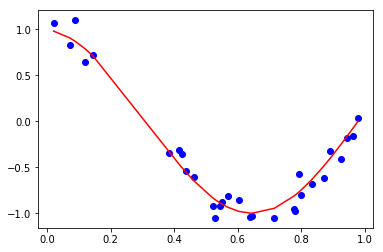

In [2]:
# Define the function to generate data points
def func_true(x):
    return np.cos(1.5*np.pi*x+0.1)

# Initialize random seed
np.random.seed(0)
N=30
# Generate noisy data points: (x,y)
x = np.random.rand(N)
x.sort()
y = func_true(x) + np.random.normal(0,0.1,N)

# Plot true model and sampled data points
pp.plot(x,y,'bo', x, func_true(x),'r')
print(x)

## P2. Fit a linear model
### TODO
- use sklearn to fit model: $h(x) = w_0 + w_1x$
- report $w=[w_0,w_1]$
- plot the fitted model $h(x)$ together with data points

[ 0.         -1.41735614]
0.4233953274418974


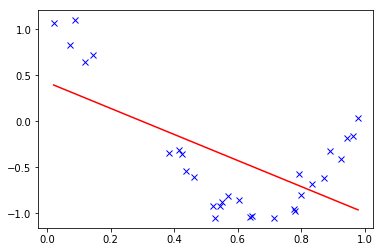

In [3]:
# Fit a linear model in the original space
x_lin = np.concatenate((np.ones((N,1)), x.reshape(1,-1).T ), axis = 1)
reg = LinearRegression().fit(x_lin, y.T)


# Plot fitted linear model
pp.plot(x, y,'bx', x, reg.predict(x_lin) , 'r')

print(reg.coef_)
print(reg.intercept_)
        
#np.arange(0,1,0.05).reshape(1,-1), reg.predict(np.arange(0,1,0.05).reshape(1,-1)),'rx')

## P3. Fit a polynomial curve
### TODO
- augment the original feature to $[x, x^2, \cdots, x^{15}]$
- fit the polynomial curve: $h(x) = \sum_{i=0}^{15} w_i x^{i}$
- report $w=[w_0,w_1, \cdots, w_{15}]$
- plot the fitted model $h(x)$ together with data points

In [9]:
# Augment the original feature to a 15-vector
def augment(x):
    x_pol = np.concatenate((np.ones((len(x) ,1)), x.reshape(1,-1).T ), axis = 1)
    for i in range(2,16):
        x_pol = np.concatenate( (x_pol, np.power(x.reshape(1,-1).T , i)) , axis=1)
        
    return x_pol

# x_pol = x_lin;
# for i in range(2,16):
#     x_pol = np.concatenate( (x_pol, np.power(x.reshape(1,-1).T , i)) , axis=1)


(100,)
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[ 0.00000000e+00 -2.98343728e+03  1.03900691e+05 -1.87418142e+06
  2.03718531e+07 -1.44874876e+08  7.09322890e+08 -2.47068331e+09
  6.24567290e+09 -1.15677638e+10  1.56896435e+10 -1.54007471e+10
  1.06458251e+10 -4.91382046e+09  1.35920886e+09 -1.70382336e+08]


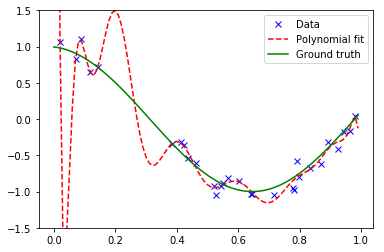

In [19]:
# Fit linear model to the generated 15-vector features
reg = LinearRegression().fit(augment(x), y.T)

x_r = np.arange(0,1,0.01)

# Plot fitted curve and sampled data points
pp.plot(x, y,'bx',label = 'Data')
pp.plot(x_r, reg.predict(augment(x_r)) , 'r--', label = 'Polynomial fit')
pp.plot(x_r, func_true(x_r),'g', label ='Ground truth')
pp.ylim((-1.5, 1.5))
pp.legend(loc='upper right')

print(reg.coef_)

## P4. Lasso regularization
### TODO
- use sklearn to fit a 15-degree polynomial model with L1 regularization
- report $w$
- plot the fitted model $h(x)$ together with data points

[ 0.         -4.24800646  0.          0.          3.26144942  0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.        ]


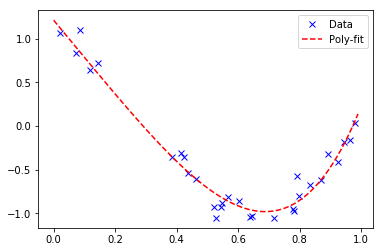

In [29]:
# Fit 15-degree polynomial with L1 regularization 
# Start with lambda(alpha) = 0.01 and max_iter = 1e4
clf = linear_model.Lasso(alpha=0.00125)
clf.fit(augment(x), y.T)

x_r = np.arange(0,1,0.01)

# Plot fitted curve and sampled data points
pp.plot(x, y,'bx', label='Data')
pp.plot(x_r, clf.predict(augment(x_r)) , 'r--', label='Poly-fit')
pp.legend(loc='upper right')

print(clf.coef_)

It seems that lambda = 0.00125 is the optimal regularisation hyper-parameter. We can observe that for the given lambda, we get a 4th degree polynomial given by  y = (3.261) x^4 - (4.248) x